<a href="https://colab.research.google.com/github/amthreeh/ComputerVision_Seminar/blob/main/%EA%B3%BC%EC%A0%9C/week3_cv_seminar_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3주차 과제

###2주차 과제 풀이
- 현재 original 폴더 안에 dolphin, shark, whale의 하위 폴더가 있으며 내부에는 각 이미지가 존재합니다.        
- cv_seminar_project의 상위 경로에서 train, valid, test 폴더를 만든 뒤 해당 폴더 안에 각 클래스 별 폴더를 또 생성해준 뒤, 각각 7:2:1로 개수를 맞추어 image를 재배치 시켜주세요.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install ex1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement ex1 (from versions: none)
ERROR: No matching distribution found for ex1


In [ ]:
#이미지 읽어오는 데 필요한 라이브러리
import cv2 as cv
import glob
import shutil
from collections import defaultdict
import os



In [ ]:
%cd /content/drive/MyDrive/CV_seminar_project/original

/content/drive/.shortcut-targets-by-id/15cHemEJmMHXCe0eBtkCU27FPQaJVpnCW/original


In [ ]:
pwd

'/content/drive/.shortcut-targets-by-id/15cHemEJmMHXCe0eBtkCU27FPQaJVpnCW/original'

#이미지 불러오기

In [ ]:
import glob
'''glob 함수를 이용하면, 해당 경로에 있는 파일들의 경로를 전부 리스트로 얻어올 수 있습니다.'''
dolphin_img_list = glob.glob("/content/drive/MyDrive/CV_seminar_project/original/dolphin/*")
shark_img_list = glob.glob("/content/drive/MyDrive/CV_seminar_project/original/shark/*")
whale_img_list = glob.glob("/content/drive/MyDrive/CV_seminar_project/original/whale/*")

dic = {'dolphin':dolphin_img_list, 'shark': shark_img_list, 'whale':whale_img_list}
for key in dic.keys():
  print(f'{key}이미지가', len(dic[key]), '개 있습니다.')

length_list = []
for key in dic.keys():
  print(f'{key}이미지는 train, valid, test셋에 대해 ', int(len(dic[key])*0.7), int(len(dic[key])*0.2), int(len(dic[key])*0.1),'개씩 배정')
  length_list.append([int(len(dic[key])*0.7), int(len(dic[key])*0.2), int(len(dic[key])*0.1)])

dolphin이미지가 373 개 있습니다.
shark이미지가 488 개 있습니다.
whale이미지가 451 개 있습니다.
dolphin이미지는 train, valid, test셋에 대해  261 74 37 개씩 배정
shark이미지는 train, valid, test셋에 대해  341 97 48 개씩 배정
whale이미지는 train, valid, test셋에 대해  315 90 45 개씩 배정


In [ ]:
import os
import glob
import cv2
import time

class Make_dataset_dir():
  def __init__(self, root_dir):
    self.root_path = root_dir+'/' if root_dir[-1] != '/' else root_dir # 현재 진행할 프로젝트
    self.img_path_list = root_dir+'original' # 전달한 이미지들의 상위 경로
    self.trainset_path = root_dir+'train/'
    self.validset_path = root_dir+'valid/'
    self.testset_path = root_dir+'test/'
    self.class_list = ['dolphin', 'shark', 'whale']

  def mk_dir(self):
    '''train, valid, test 폴더를 만들고, 내부에는 클래스 별 폴더를 추가로 만들어 주세요.'''
    dataset_dir_list = [self.trainset_path, self.validset_path, self.testset_path]
    for dataset_dir in dataset_dir_list:
      for cls in self.class_list:
        os.makedirs(dataset_dir+cls, exist_ok=True)
    print('디렉토리 생성을 완료하였습니다.')
    
  def move_img(self):
    '''mk_dir에서 만든 폴더들에 각 클래스에 맞는 이미지를 배당해주세요. train, valid, test에 각각 7: 2: 1'''
    dolphin_img_list = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/dolphin/*')
    shark_img_list = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/shark/*')
    whale_img_list = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/whale/*')
    
    dic = {'dolphin':dolphin_img_list, 'shark': shark_img_list, 'whale': whale_img_list} # 딕셔너리 생성
    for key in dic.keys():
      length_list.append([int(len(dic[key])*0.7), int(len(dic[key])*0.2), int(len(dic[key])*0.1)]) # 클래스 별 분할 개수 리스트 생성

    for i,key in enumerate(dic.keys()):
      spliting_length = length_list[i]

      for ii, img_path in enumerate(dic[key]):
        if ii+1 <= spliting_length[0] : # train셋 개수이면,
          img = cv2.imread(img_path)
          img_name = img_path.split('/')[-1]
          cv2.imwrite(self.trainset_path + '/' + key + '/' + img_name, img)

        elif spliting_length[0] < ii+1 and ii+1 <= spliting_length[0] + spliting_length[1]: # valid셋 개수이면,
          img = cv2.imread(img_path)
          img_name = img_path.split('/')[-1]
          cv2.imwrite(self.validset_path + '/' + key + '/' + img_name, img)

        else:
          img = cv2.imread(img_path)
          img_name = img_path.split('/')[-1]
          cv2.imwrite(self.testset_path + '/' + key + '/' + img_name, img)
    print('데이터 스플릿이 전부 완료되었습니다.')

  def run(self):
    start = time.time()
    self.mk_dir()
    self.move_img()
    print('총 소요시간: ', time.time()-start)

  def checking_dirs(self):
    path_list = [self.trainset_path, self.validset_path, self.testset_path]

    for i,path in enumerate(path_list):
      length_dic = {}
      for cls in self.class_list:
        length_dic[cls] = len(glob.glob(path+cls+'/*'))

      if i==0:
        for key in length_dic:
          print( f'trainset의 {key}클래스 개수: {length_dic[key]}')
        print('---------------------------------------------------------------')
      elif i==1:
        for key in length_dic:
          print( f'validset의 {key}클래스 개수: {length_dic[key]}')
        print('---------------------------------------------------------------')
      else:
        for key in length_dic:
          print( f'validset의 {key}클래스 개수: {length_dic[key]}')

In [ ]:
mdd = Make_dataset_dir('/content/drive/MyDrive/CV_seminar_project')

In [ ]:
mdd.checking_dirs()

trainset의 dolphin클래스 개수: 0
trainset의 shark클래스 개수: 0
trainset의 whale클래스 개수: 0
---------------------------------------------------------------
validset의 dolphin클래스 개수: 0
validset의 shark클래스 개수: 0
validset의 whale클래스 개수: 0
---------------------------------------------------------------
validset의 dolphin클래스 개수: 0
validset의 shark클래스 개수: 0
validset의 whale클래스 개수: 0


In [ ]:
Make_dataset_dir(root_dir='/content/drive/MyDrive/CV_seminar_project/').run()

Make_dataset_dir(root_dir='/content/drive/MyDrive/CV_seminar_project/').checking_dirs()

디렉토리 생성을 완료하였습니다.
데이터 스플릿이 전부 완료되었습니다.
총 소요시간:  15.330538749694824
trainset의 dolphin클래스 개수: 261
trainset의 shark클래스 개수: 341
trainset의 whale클래스 개수: 315
---------------------------------------------------------------
validset의 dolphin클래스 개수: 74
validset의 shark클래스 개수: 97
validset의 whale클래스 개수: 90
---------------------------------------------------------------
validset의 dolphin클래스 개수: 38
validset의 shark클래스 개수: 50
validset의 whale클래스 개수: 46


#과제1

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # cv2.imshow(img)가 안되므로 
from PIL import Image as PILImage

fig = plt.figure(figsize=(10,10))

dolphin_img_list = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/dolphin/*')
shark_img_list = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/shark/*')
whale_img_list = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/whale/*')


<Figure size 720x720 with 0 Axes>

In [ ]:
# import cv2
# import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow # cv2.imshow(img)가 안되므로 
# from PIL import Image as PILImage

# fig = plt.figure(figsize=(10,10))

# dolphin_img_list = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/dolphin/*')
# shark_img_list = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/shark/*')
# whale_img_list = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/whale/*')

# img = cv2.imread(dolphin_img_list[0]) # 이미지를 BGR로 읽음
# plt.subplot(1,2,1)
# # cv2.imshow(img) # 방법 1 -> 에러 남
# # plt.imshow(img[:,:,::-1]) # 방법 2 -> RGB로 읽어야 해서 바뀜.
# PILImage.open(dolphin_img_list[0]) # 방법 3 -> 경로를 인자로 받아서 바로 읽음

# # plt.subplot(1,2,2)
# #plt.imshow(img[100, 100])

In [ ]:
def read_img(file_path):
  img_arr = cv2.imread(file_path)
  return cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)

In [ ]:

img_arrs = []


for i in range(1,4):
  img_arrs.append(read_img(dolphin_img_list[i]))
  img_arrs.append(read_img(shark_img_list[i]))
  img_arrs.append(read_img(whale_img_list[i]))

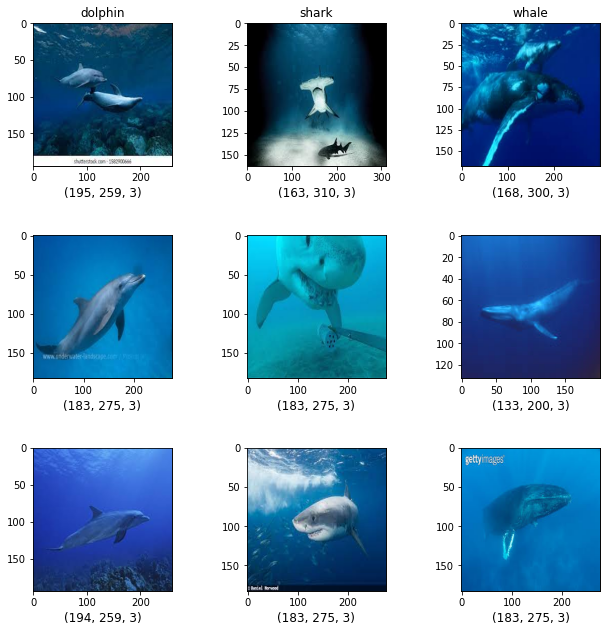

In [ ]:
rows = 3
columns = 3

fig,axes = plt.subplots(nrows=rows, ncols= columns, figsize=(columns*3, rows*3))

for num in range(1, rows*columns+1):

  fig.add_subplot(rows, columns, num)
  idx = num - 1

  plt.imshow(img_arrs[idx], aspect = 'auto')
  plt.xlabel(f'{img_arrs[idx].shape}', fontsize=12)

fig.tight_layout()

cols = ['dolphin', 'shark', 'whale']

for folder_idx, ax in enumerate(axes[0]):
  ax.set_title(cols[folder_idx])

for idx, ax in enumerate(axes.flat):
  ax.set_xticks([])
  ax.set_yticks([])

#과제2

(259, 194, 3)


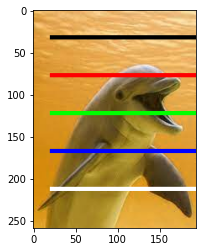

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # cv2.imshow(img)가 안되므로 
from PIL import Image as PILImage

dolphin_img_list = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/dolphin/*')

img = cv2.imread(dolphin_img_list[0])
print(img.shape)

h, w, _ = img.shape

h = len(img)/5

h1 = 0+30
h2 = 45+30
h3 = 90+30
h4 = 135+30
h5 = 180+30

for i in range(5):
  img[h1+i][20:225-20] = 0,0,0
for i in range(5):
  img[h2+i][20:225-20] = 255,0,0
for i in range(5):
  img[h3+i][20:225-20] = 0,255,0
for i in range(5):
  img[h4+i][20:225-20] = 0,0,255
for i in range(5):
  img[h5+i][20:225-20] = 255,255,255
[0,0,0]#검정색
[0,0,255] #파란색


plt.imshow(img)